          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.102578 -0.787688  4.719307 -1.776635  5.965742 -0.112067 -0.704548   
1   -1.113674 -1.724675  5.337998 -0.396595  6.006969 -0.443274 -2.160864   
2   -0.276250 -2.363237  5.136926 -0.555974  6.779163 -1.410207 -1.246259   
3   -0.773030 -2.517412  4.607077 -0.601835  6.865661 -0.750354 -2.390833   
4   -0.514028 -1.778956  5.076129 -0.498710  5.267070  0.032931 -2.948762   
..        ...       ...       ...       ...       ...       ...       ...   
432  4.817638  1.441280  0.095076 -1.146981 -0.123918  1.438296 -0.008159   
433  5.190719  1.774619  0.136113 -0.085203  0.226699  1.439238  0.027244   
434  4.946508  0.897808  1.382054 -0.324816 -0.666081  1.605804 -2.312664   
435  5.515037  0.785239  0.083827 -0.610466 -0.334266  0.612895  0.371997   
436  5.155918  0.889566 -0.451564 -0.745681 -1.250166  1.255339  0.382662   

          PC8       PC9      PC10      PC11      PC12 Cell_lable  
0   -0.4

C:\Users\a2456\AppData\Local\Temp\ipykernel_6972\3302884692.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))
C:\Users\a2456\AppData\Local\Temp\ipykernel_6972\3302884692.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(subset['PC1'], subset['PC2'],subset['PC4'], label=str(cell_type), cmap=colormap, color=colormap(idx))


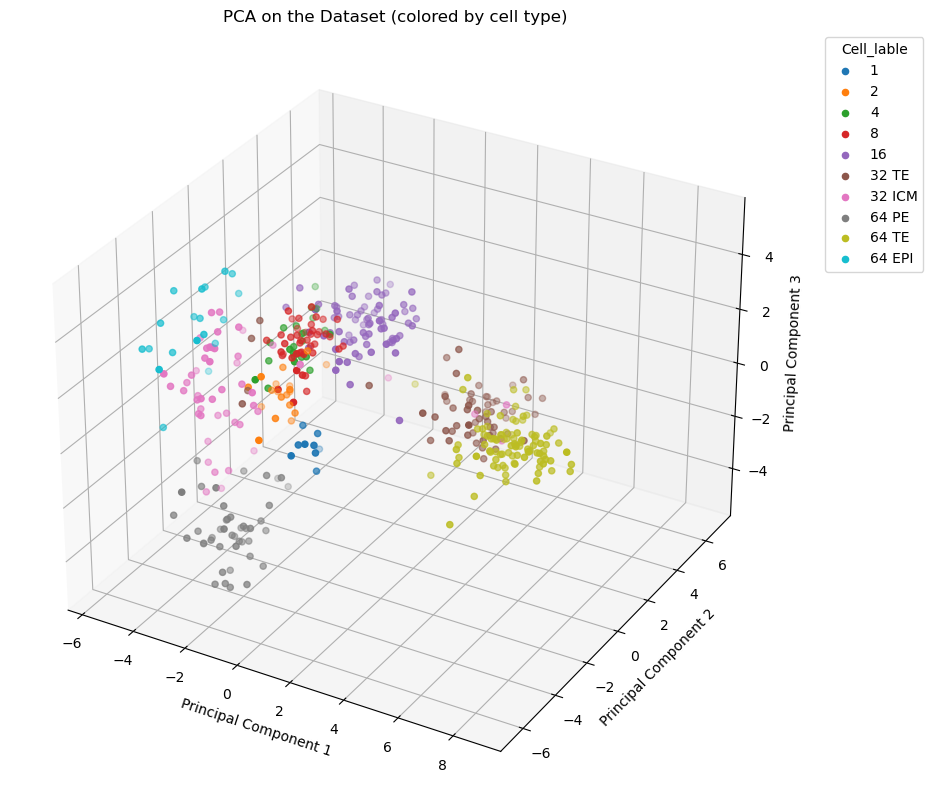

C:\Users\a2456\AppData\Local\Temp\ipykernel_6972\3302884692.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))


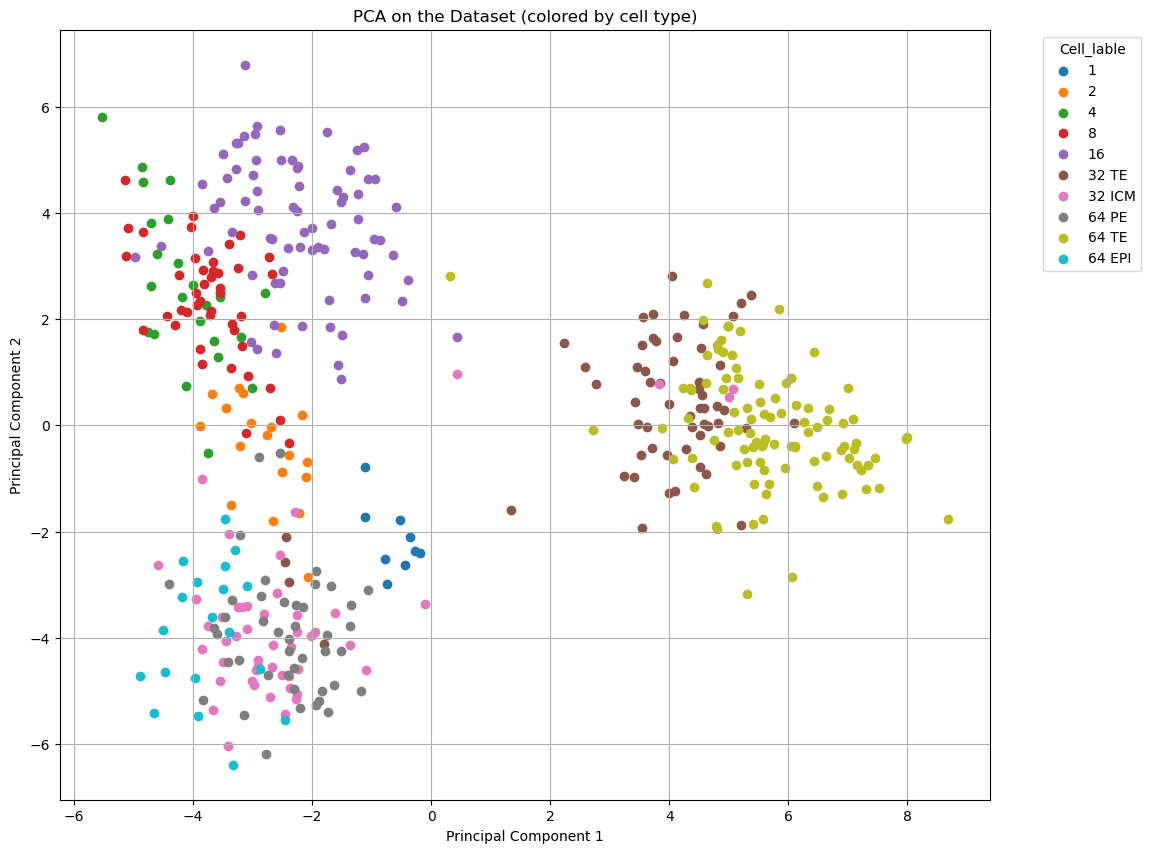

[0.32763464 0.18134493 0.08488334 0.05886358 0.03519212 0.02950438
 0.02672334 0.01807116 0.01661197 0.01506656 0.0144983  0.01351806]


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# 导入数据
data = pd.read_csv('D:\AI\SKlearn\Dataset\GuoData.csv')

# 展示前几行的数据
data.head()
#将细胞标签单独存储
cell_label=data['cell']
#删除cell列
del data['cell']
# 可以进行主成分分析了
# 对数据标准化
data_std = StandardScaler().fit_transform(data)
# 创建分析对象pca,主成分为
pca = PCA(n_components=12)
# 进行主成分分析
principalComponents = pca.fit_transform(data_std)
# 创建一个新的dataframe存储处理后的数据
PCA_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
# 把原先的cell_lable加上去
PCA_df['Cell_lable'] = cell_label
print(PCA_df)
# 找出单一细胞标签
unique_cell_types = PCA_df['Cell_lable'].unique()
# 创建细胞标签和颜色的映射，便于数据可视化
# tab10为matplotlib内置的颜色之一
colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))
#数据可视化,用三维图表展示

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell_lable'] == cell_type]
    ax.scatter(subset['PC1'], subset['PC2'],subset['PC4'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(title='Cell_lable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(12,10))
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell_lable'] == cell_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell_lable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


variance_explained = pca.explained_variance_ratio_
print(variance_explained)



11


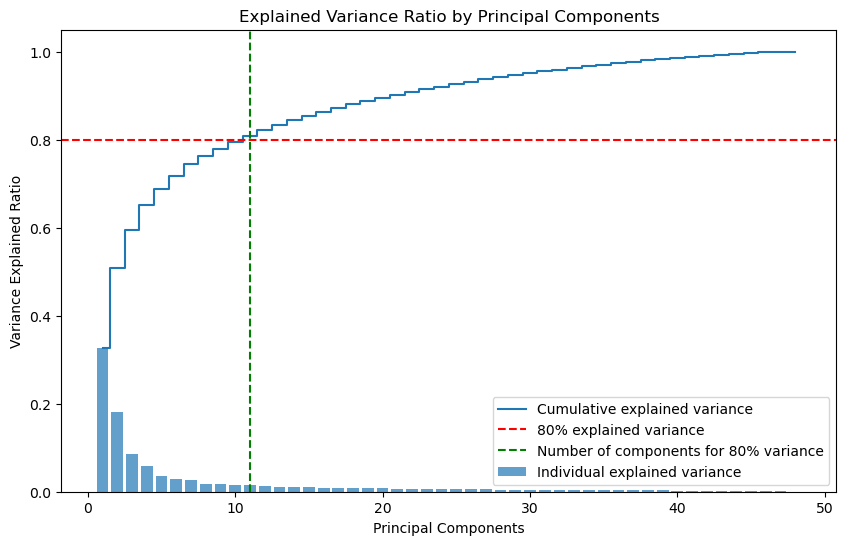

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)  # None表示保留所有主成分

# 对数据进行PCA
pca.fit(data)

# 获取每个主成分的方差解释比例
variance_explained = pca.explained_variance_ratio_
principalComponents = pca.fit_transform(data_std)
# 输出每个主成分的方差解释比例

# 计算累积方差贡献
cumulative_variance = np.cumsum(variance_explained)
# np.where(cumulative_variance > 0.8) 用于找到累积方差大于0.8的位置。这个条件可能是为了确定保留多少主成分，以使累积方差达到80%以上
# np.where 返回满足条件的数组索引
# [0][0] 用于从返回的索引数组中获取第一个元素的值。这是因为 np.where 返回的是一个包含满足条件的索引的元组，第一个元素是满足条件的索引数组
#最后，+ 1 是因为数组的索引是从零开始的，所以为了得到实际的主成分数量，需要加1
num_components = np.where(cumulative_variance > 0.8)[0][0] + 1 

print(num_components)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')
plt.axvline(x=num_components, color='g', linestyle='--', label='Number of components for 80% variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv('D:\ML-all\SKlearn\Dataset\GuoData.csv')

# 单独保存cell列
cell_label=data['cell']

#print(data.to_string())
# 可以进行主成分分析了

data_std= data[data['cell']=='2']
#print(data_std.to_string())

#删除cell列
del data['cell']
# 对数据标准化
data_std = StandardScaler().fit_transform(data)

# 主成分分析
pca = PCA(n_components=None)
pca.fit(data)
# 计算主成分加载矩阵
loadings_matrix = pca.components_
# 输出主成分加载矩阵
print("主成分加载矩阵:")
df =pd.DataFrame(loadings_matrix)
#print(df.to_string())
# 找到主成分加载矩阵的最大值
max_loading_indices = np.argsort(np.abs(loadings_matrix), axis=1)[:, -2:]
max_loading_values = loadings_matrix[np.arange(loadings_matrix.shape[0])[:, None], max_loading_indices]

print(max_loading_values)


主成分加载矩阵:
[[-0.21400968 -0.2141333 ]
 [ 0.24956137  0.25162806]
 [ 0.2623481   0.30615763]
 [-0.36446494 -0.4018333 ]
 [ 0.31503137  0.31946308]
 [ 0.40295359  0.40686759]
 [ 0.40324045  0.41333516]
 [-0.31324166 -0.52777936]
 [-0.47107859  0.47107859]
 [-0.42339606  0.50430274]
 [ 0.33980853 -0.61436862]
 [-0.33432697 -0.64511744]
 [-0.33073442  0.34465839]
 [-0.39746484 -0.45108818]
 [-0.34503203 -0.55442927]
 [ 0.32822489 -0.46084468]
 [-0.37143081  0.43781706]
 [-0.35196276 -0.36308912]
 [ 0.38865308  0.50316329]
 [-0.3050702  -0.52206157]
 [ 0.31750183 -0.33849167]
 [ 0.36584518 -0.47263099]
 [-0.40062238 -0.41212148]
 [ 0.30438179 -0.51105738]
 [ 0.38222843  0.3933045 ]
 [ 0.31443374 -0.4832111 ]
 [-0.35091098 -0.46914874]
 [ 0.35794971 -0.38577814]
 [ 0.42636126  0.57763305]
 [-0.30119271 -0.39939461]
 [-0.3992808  -0.42572722]
 [ 0.33410586  0.34071426]
 [ 0.34398972 -0.37307249]
 [ 0.31021968 -0.37287012]
 [ 0.34202896  0.48715463]
 [ 0.35802374 -0.4546672 ]
 [ 0.35121877 -0.35

C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\2157100026.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newer_df['cell']='other cell'
C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\2157100026.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))
C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\2157100026.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], [0] * len(subset), label=str(cell_type), cmap=colormap, color=colormap(idx))


           cell      Actb      Ahcy      Aqp3    Atp12a      Bmp4      Cdx2  \
0    other cell -0.541050  1.203007 -1.030746 -1.064808 -0.494782  0.167143   
1    other cell -0.680832  1.355306 -2.456375 -1.234350 -0.645494 -1.003868   
2    other cell -1.056038  1.280447 -2.046133 -1.439795 -0.828121 -0.983404   
3    other cell -0.732331  1.326911 -2.464234 -1.244323 -0.654359 -0.947023   
4    other cell -0.629333  1.244308 -1.316815 -1.304162 -0.707552 -1.429070   
..          ...       ...       ...       ...       ...       ...       ...   
164  other cell  2.078036  1.135892  1.072332  1.420479  0.182534  1.399547   
165  other cell  1.643974  1.412095  1.611462  1.238969 -0.106478  1.388178   
166  other cell  1.151056  0.846783  1.072332  0.989643 -0.111797  0.399071   
167  other cell  0.724351  1.104916  1.119486  0.654548 -0.402582  0.990261   
168  other cell  1.511548  1.551487  1.271952 -0.460441  0.741053  0.242179   

      Creb312     Cebpa      Dab2  ...      Sox2   

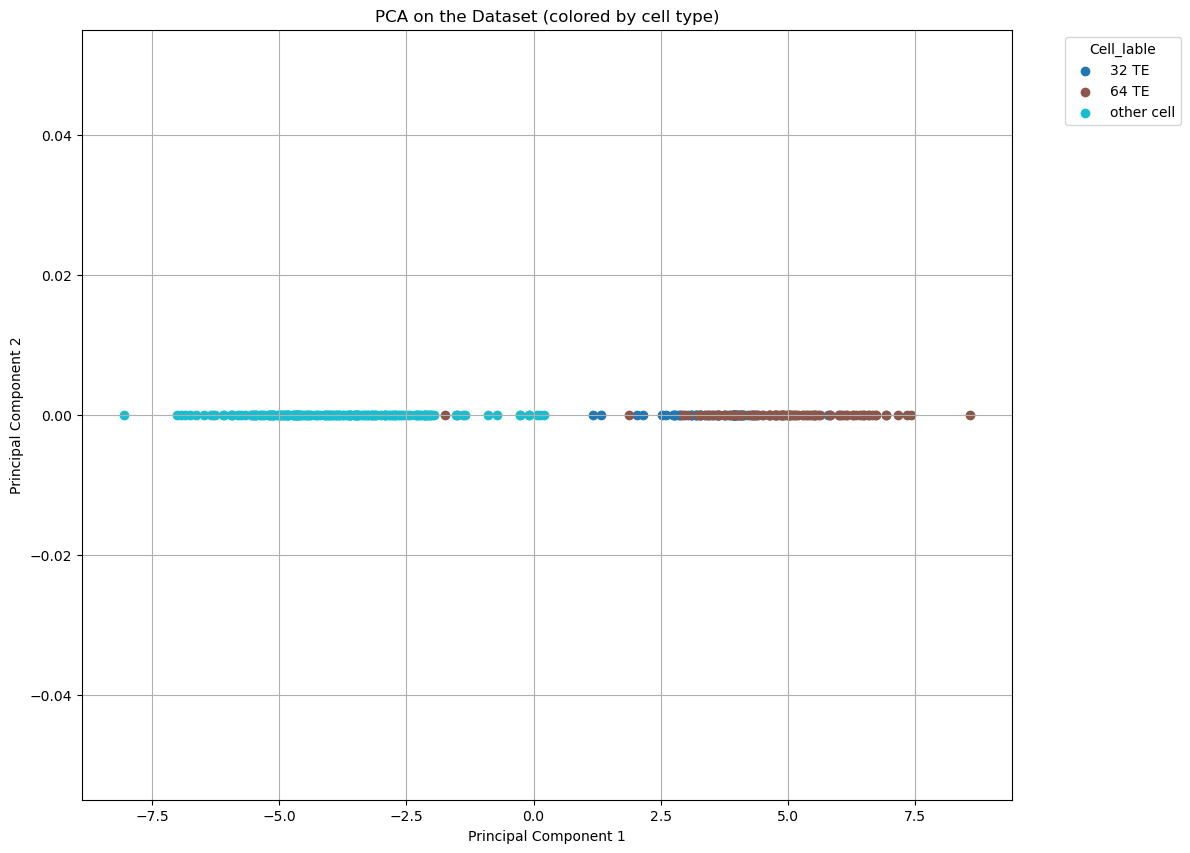

C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\2157100026.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))


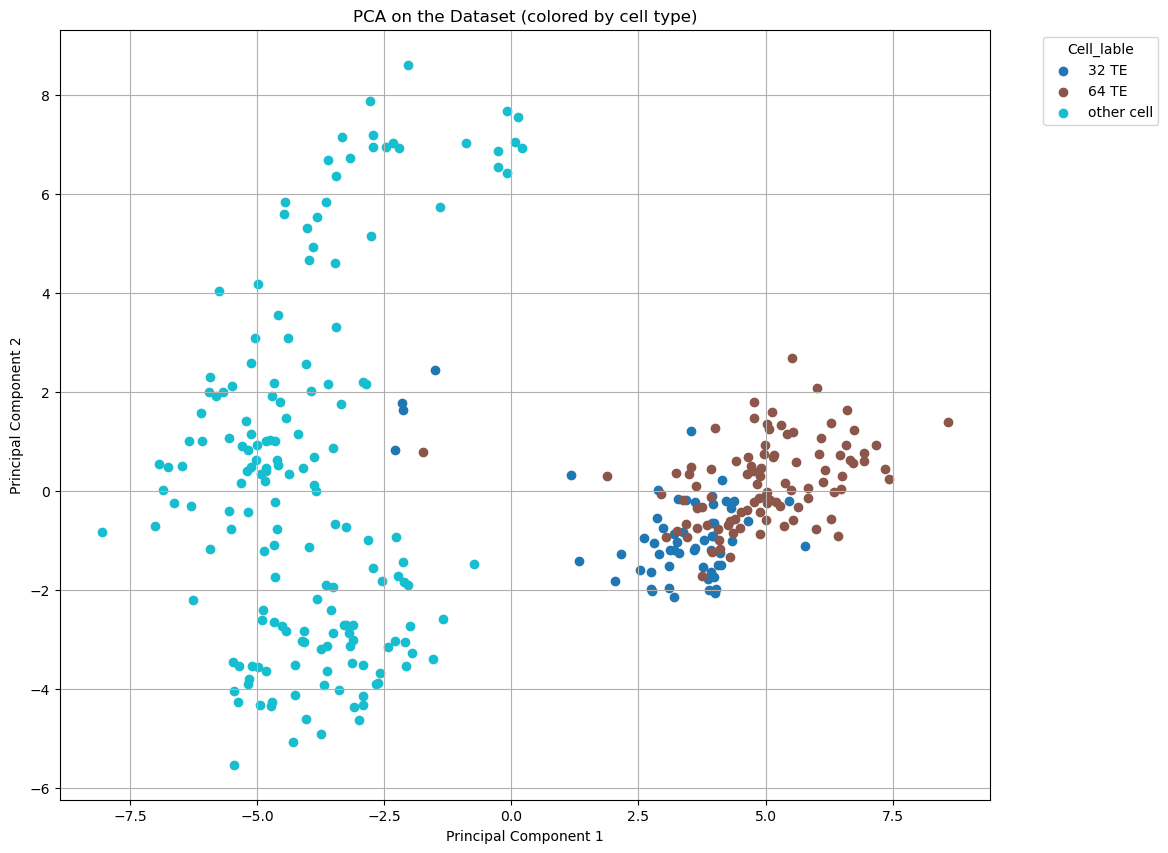

In [ ]:
df = pd.read_csv('D:\ML-all\SKlearn\Dataset\GuoData.csv')

#new_df=df[df['cell'].isin(['1','4','2','8','16','32','32ICM','64PE','64EPI'])]
#这是有用的TE数据
new_df=df[df['cell'].isin(['32 TE','64 TE'])]
#这是剔除TE后的数据
newer_df=df[df['cell'].isin(['1','4','2','8','16','32','32ICM','64PE','64EPI'])]
newer_df['cell']='other cell'


print(newer_df)
unique_values = df['cell'].unique()
print("cell 列的唯一值:", unique_values)
combined_df = pd.concat([new_df, newer_df], ignore_index=True)

#将细胞标签单独存储
cell_label=combined_df['cell']
#删除cell列
del combined_df['cell']
# 可以进行主成分分析了
# 对数据标准化
data_std = StandardScaler().fit_transform(combined_df)
# 创建分析对象pca,主成分为
pca = PCA(n_components=12)
# 进行主成分分析
principalComponents = pca.fit_transform(data_std)
# 创建一个新的dataframe存储处理后的数据
PCA_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
# 把原先的cell_lable加上去
PCA_df['Cell_lable'] = cell_label
print(PCA_df)
# 找出单一细胞标签
unique_cell_types = PCA_df['Cell_lable'].unique()
# 创建细胞标签和颜色的映射，便于数据可视化
# tab10为matplotlib内置的颜色之一
colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))

plt.figure(figsize=(12,10))
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell_lable'] == cell_type]
    plt.scatter(subset['PC1'], [0] * len(subset), label=str(cell_type), cmap=colormap, color=colormap(idx))
    #plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell_lable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,10))
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell_lable'] == cell_type]
    #plt.scatter(subset['PC1'], [0] * len(subset), label=str(cell_type), cmap=colormap, color=colormap(idx))
    plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell_lable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()




           cell      Actb      Ahcy      Aqp3    Atp12a      Bmp4      Cdx2  \
0    other cell -0.541050  1.203007 -1.030746 -1.064808 -0.494782  0.167143   
1    other cell -0.680832  1.355306 -2.456375 -1.234350 -0.645494 -1.003868   
2    other cell -1.056038  1.280447 -2.046133 -1.439795 -0.828121 -0.983404   
3    other cell -0.732331  1.326911 -2.464234 -1.244323 -0.654359 -0.947023   
4    other cell -0.629333  1.244308 -1.316815 -1.304162 -0.707552 -1.429070   
..          ...       ...       ...       ...       ...       ...       ...   
432  other cell  0.981846 -0.652971  0.376022  1.414495 -0.372440  0.978892   
433  other cell  1.298196 -0.980800  0.767402  1.408511 -0.551521  0.644643   
434  other cell  0.716994 -0.787200 -0.020074 -1.226372 -0.638402  0.806083   
435  other cell  1.003917 -1.522880  0.289572  1.532177 -0.246551  0.603714   
436  other cell  0.525713 -1.731967  0.099383  1.079400 -0.319247  0.928868   

      Creb312     Cebpa      Dab2  ...      Sox2   

C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\840703383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newer_df['cell']='other cell'
C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\840703383.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))
C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\840703383.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC2'], subset['PC3'], label=str(cell_type), cmap=colormap, color=colormap(idx))


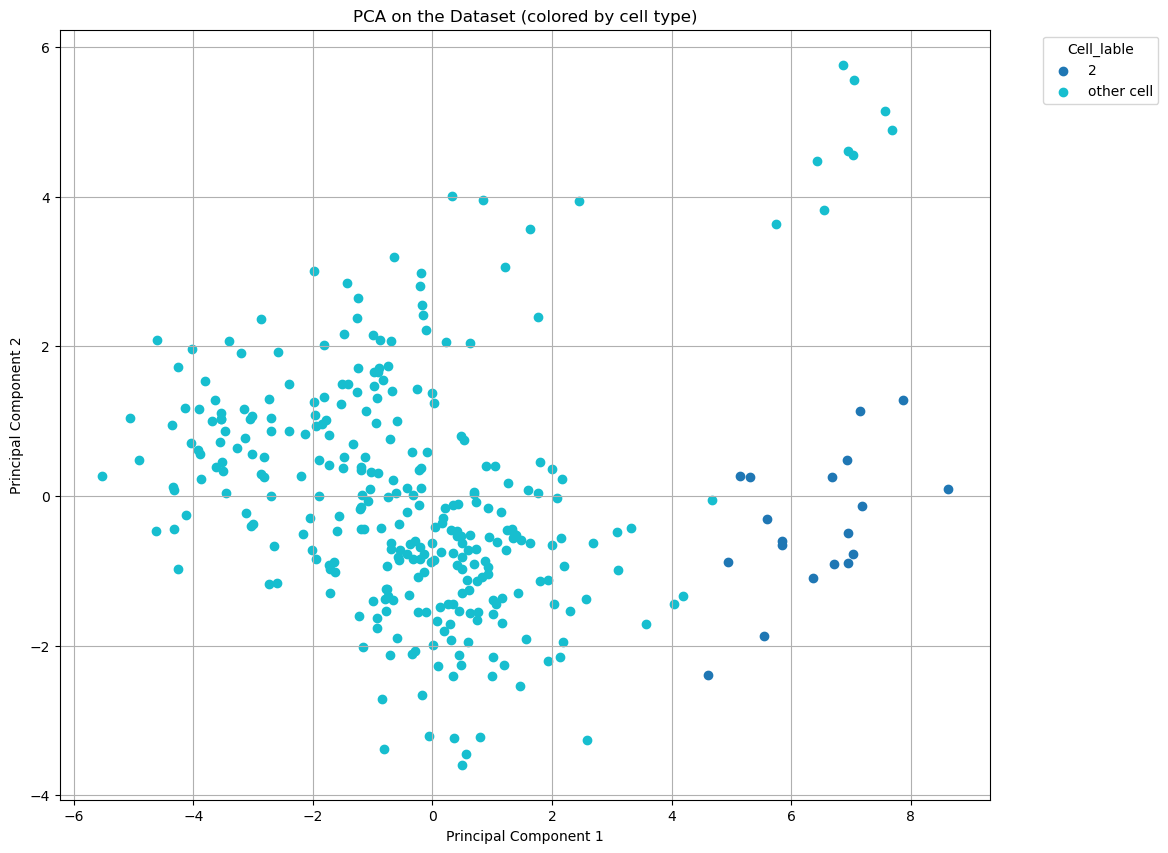

C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\840703383.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))


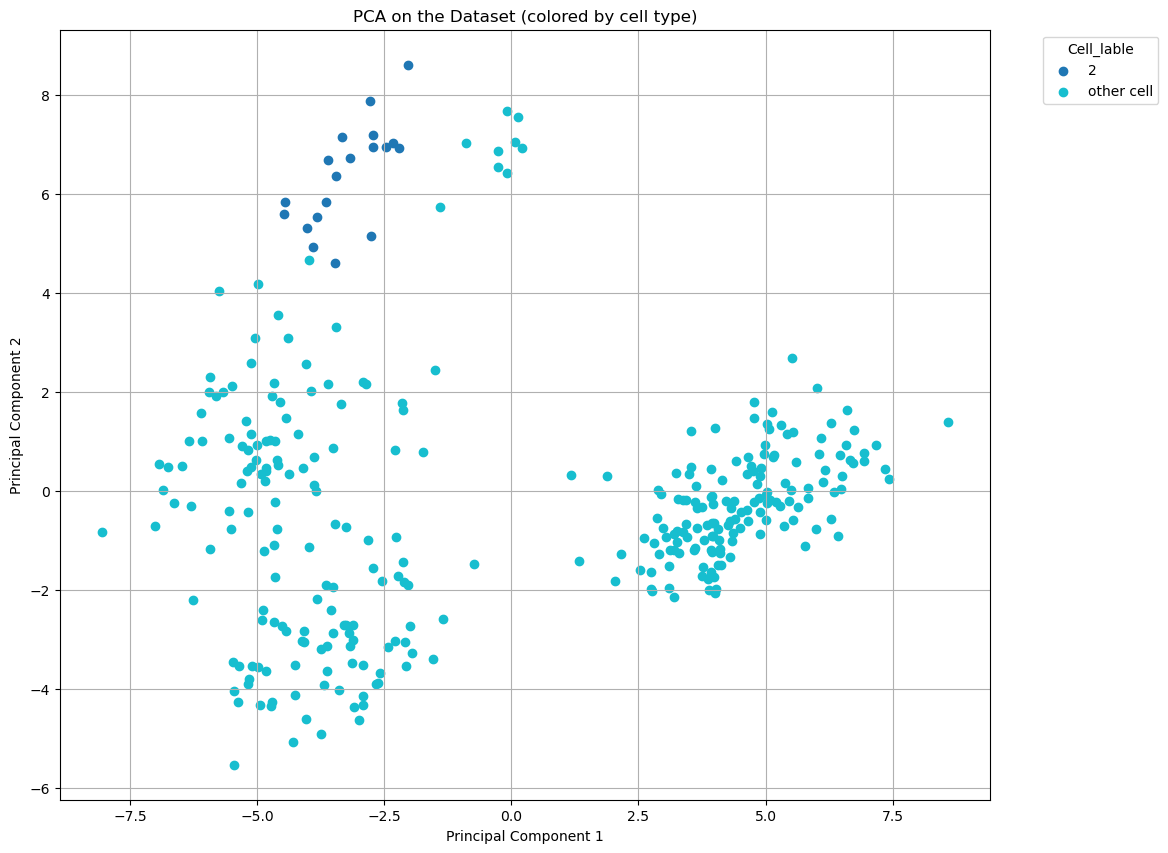

C:\Users\a2456\AppData\Local\Temp\ipykernel_17988\840703383.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC3'], label=str(cell_type), cmap=colormap, color=colormap(idx))


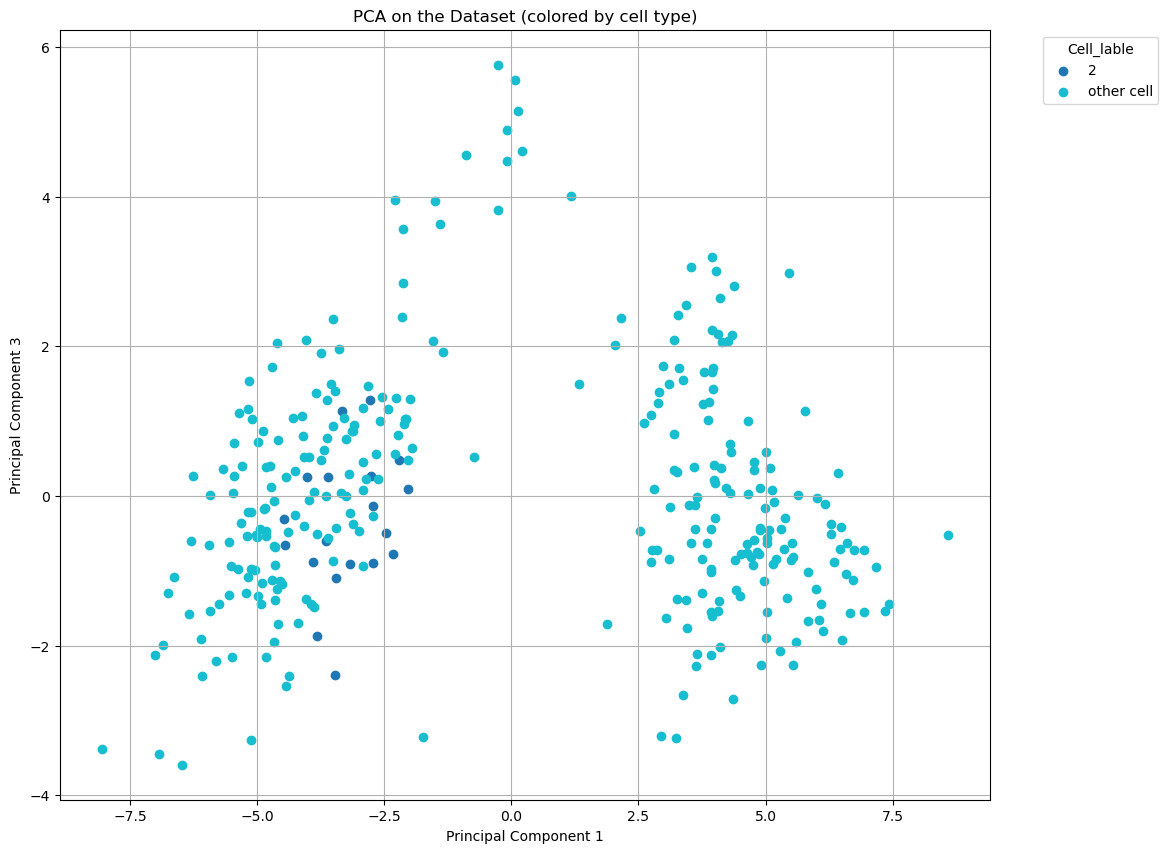

In [ ]:
df = pd.read_csv('D:\ML-all\SKlearn\Dataset\GuoData.csv')

#new_df=df[df['cell'].isin(['1','4','2','8','16','32','32ICM','64PE','64EPI'])]
#这是有用的TE数据
new_df=df[df['cell'].isin(['2'])]
#这是剔除TE后的数据
newer_df=df[df['cell'].isin(['1','4','32 TE','64 TE','8','16','32','32ICM','64PE','64EPI'])]
newer_df['cell']='other cell'


print(newer_df)
unique_values = df['cell'].unique()
print("cell 列的唯一值:", unique_values)
combined_df = pd.concat([new_df, newer_df], ignore_index=True)

#将细胞标签单独存储
cell_label=combined_df['cell']
#删除cell列
del combined_df['cell']
# 可以进行主成分分析了
# 对数据标准化
data_std = StandardScaler().fit_transform(combined_df)
# 创建分析对象pca,主成分为
pca = PCA(n_components=12)
# 进行主成分分析
principalComponents = pca.fit_transform(data_std)
# 创建一个新的dataframe存储处理后的数据
PCA_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
# 把原先的cell_lable加上去
PCA_df['Cell_lable'] = cell_label
print(PCA_df)
# 找出单一细胞标签
unique_cell_types = PCA_df['Cell_lable'].unique()
# 创建细胞标签和颜色的映射，便于数据可视化
# tab10为matplotlib内置的颜色之一
colormap = plt.cm.get_cmap('tab10', len(unique_cell_types))

plt.figure(figsize=(12,10))
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell_lable'] == cell_type]
    #plt.scatter(subset['PC1'], [0] * len(subset), label=str(cell_type), cmap=colormap, color=colormap(idx))
    plt.scatter(subset['PC2'], subset['PC3'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell_lable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(12,10))
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell_lable'] == cell_type]
    #plt.scatter(subset['PC1'], [0] * len(subset), label=str(cell_type), cmap=colormap, color=colormap(idx))
    plt.scatter(subset['PC1'], subset['PC2'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell_lable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(12,10))
for idx, cell_type in enumerate(unique_cell_types):
    subset = PCA_df[PCA_df['Cell_lable'] == cell_type]
    #plt.scatter(subset['PC1'], [0] * len(subset), label=str(cell_type), cmap=colormap, color=colormap(idx))
    plt.scatter(subset['PC1'], subset['PC3'], label=str(cell_type), cmap=colormap, color=colormap(idx))
plt.title('PCA on the Dataset (colored by cell type)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(title='Cell_lable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

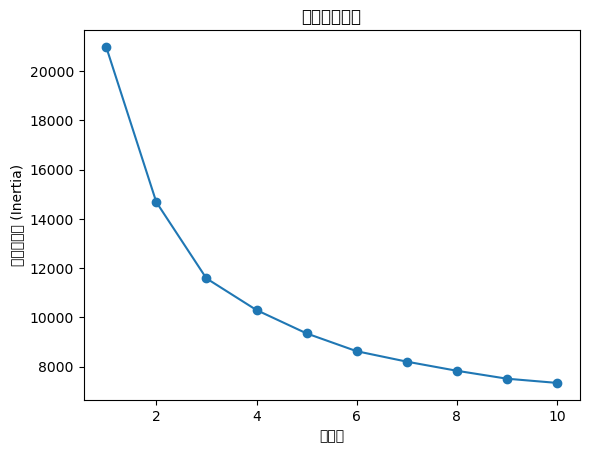

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv('D:\ML-all\SKlearn\Dataset\GuoData.csv')
del df['cell']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# 计算不同聚类数下的簇内平方和（inertia）
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# 绘制肘部法则图表
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('肘部法则图表')
plt.xlabel('聚类数')
plt.ylabel('簇内平方和 (Inertia)')
plt.show()

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2234

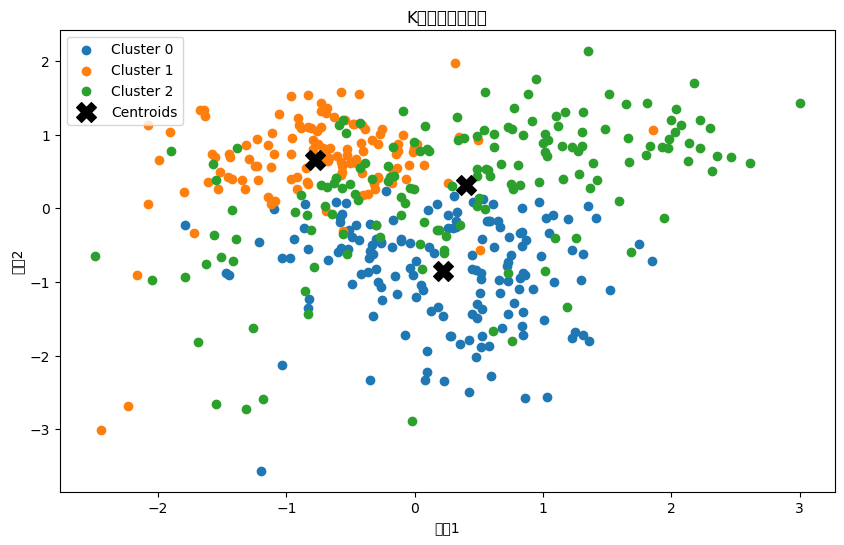

In [ ]:
# 应用K均值聚类
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# 将聚类标签添加到原始数据
data_with_clusters = pd.DataFrame(data_scaled, columns=data.columns)
data_with_clusters['Cluster'] = cluster_labels

# 可视化
plt.figure(figsize=(10, 6))

# 遍历每个聚类，绘制散点图
for cluster in range(3):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='black', label='Centroids')

plt.title('K均值聚类可视化')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.legend()
plt.show()

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.p

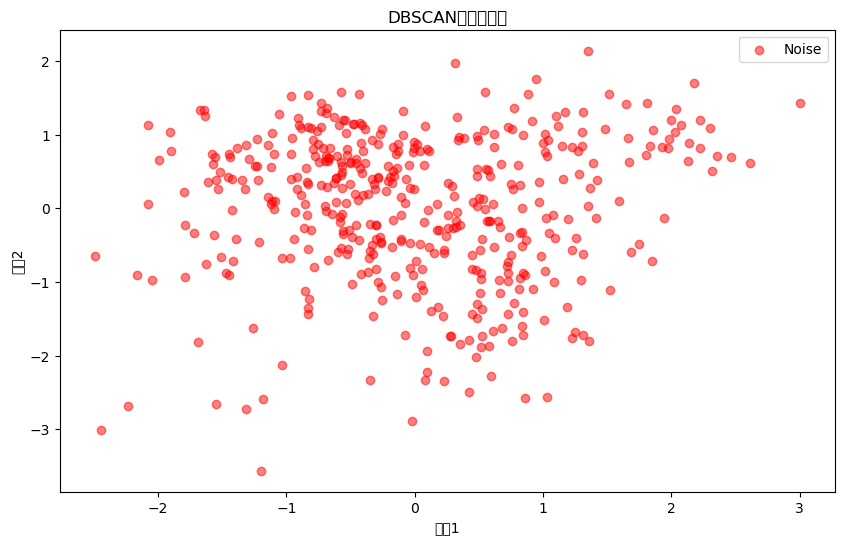

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 假设data是你的数据
# 请确保data中只包含数值型特征列，如果有非数值型特征需要进行处理
df = pd.read_csv('D:\ML-all\SKlearn\Dataset\GuoData.csv')
del df['cell']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
# 标准化数据


# 应用DBSCAN聚类
dbscan = DBSCAN(eps=1, min_samples=30)
cluster_labels = dbscan.fit_predict(data_scaled)
print(cluster_labels)


# 将聚类标签添加到原始数据
data_with_clusters = pd.DataFrame(data_scaled, columns=data.columns)
data_with_clusters['Cluster'] = cluster_labels


# 可视化
plt.figure(figsize=(10, 6))

# 绘制每个簇的散点图
for cluster in data_with_clusters['Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    if cluster == -1:
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Noise', alpha=0.5, color='red')
    else:
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

plt.title('DBSCAN聚类可视化')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.legend()
plt.show()


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED I

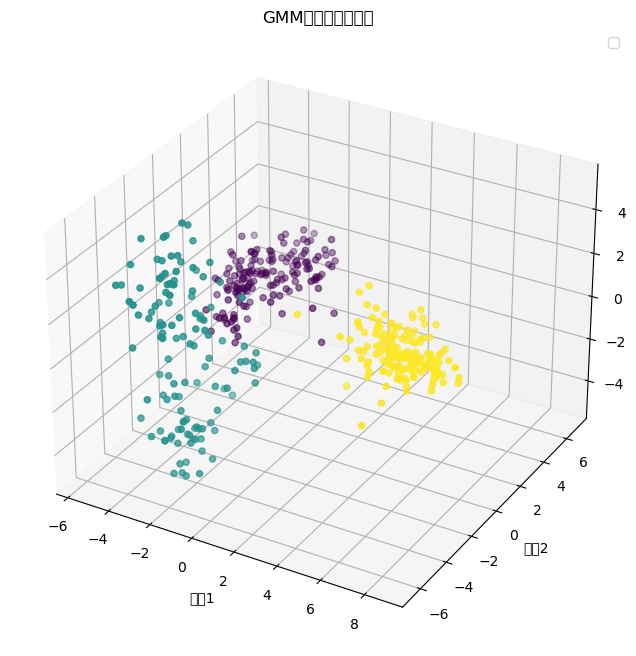

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


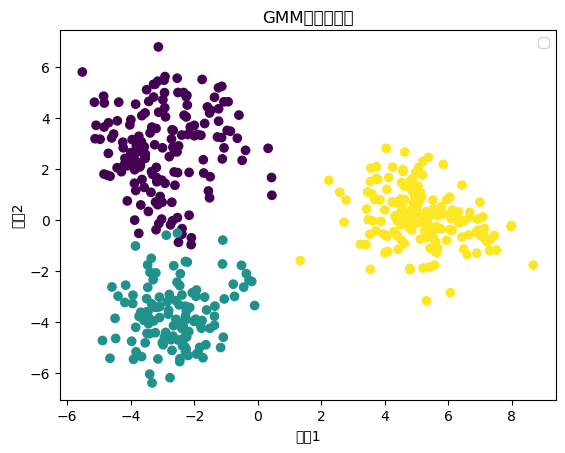

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# 假设data是你的数据
# 请确保data中只包含数值型特征列，如果有非数值型特征需要进行处理
df = pd.read_csv('D:\ML-all\SKlearn\Dataset\GuoData.csv')
del df['cell']


 

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(df)

cluster_labels = gmm.fit_predict(df)

# 将聚类标签添加到原始数据
data_with_clusters = pd.DataFrame(df, columns=df.columns)
data_with_clusters['Cluster'] = cluster_labels

# 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA(n_components=12)
reduced_features = pca.fit_transform(data_scaled)

# 三维可视化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个簇的散点图
ax.scatter(reduced_features[:, 0], reduced_features[:, 1],reduced_features[:, 3],c=cluster_labels )
ax.set_title('GMM三维聚类可视化')
ax.set_xlabel('特征1')
ax.set_ylabel('特征2')
ax.set_zlabel('特征3')
ax.legend()

plt.show()


plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels)

plt.title('GMM聚类可视化')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.legend()
plt.show()

# 算法已经实现了，就是导包，一小句代码就解决了。关键问题在于绘图。
#通过PCA降维，你可以将数据映射到较低维度的空间，
#然后绘制这个新的低维度表示，以便更容易地观察和理解聚类效果。

0          1
1          1
2          1
3          1
4          1
       ...  
432    64 TE
433    64 TE
434    64 TE
435    64 TE
436    64 TE
Name: cell, Length: 437, dtype: object
         Actb      Ahcy      Aqp3    Atp12a      Bmp4      Cdx2   Creb312  \
0   -0.541050  1.203007 -1.030746 -1.064808 -0.494782  0.167143  1.369092   
1   -0.680832  1.355306 -2.456375 -1.234350 -0.645494 -1.003868  1.207595   
2   -1.056038  1.280447 -2.046133 -1.439795 -0.828121 -0.983404  1.460032   
3   -0.732331  1.326911 -2.464234 -1.244323 -0.654359 -0.947023  1.265609   
4   -0.629333  1.244308 -1.316815 -1.304162 -0.707552 -1.429070  0.895578   
..        ...       ...       ...       ...       ...       ...       ...   
432  0.981846 -0.652971  0.376022  1.414495 -0.372440  0.978892  0.636869   
433  1.298196 -0.980800  0.767402  1.408511 -0.551521  0.644643 -0.926355   
434  0.716994 -0.787200 -0.020074 -1.226372 -0.638402  0.806083 -1.003183   
435  1.003917 -1.522880  0.289572  1.532177 -0.2

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


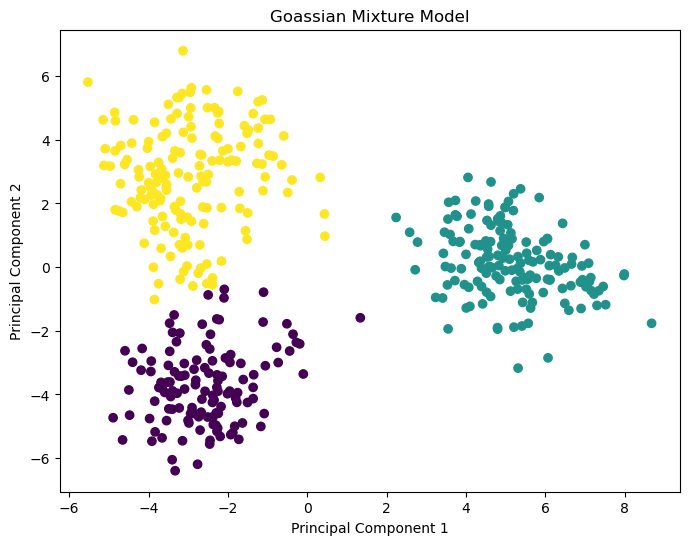

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 读取数据集
guo_data = pd.read_csv('D:\ML-all\SKlearn\Dataset\GuoData.csv')

# 获取原始类别
labels = guo_data.iloc[:, 0]

# 获取特征数据
features = guo_data.iloc[:, 1:]
print(labels)
print(features)

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(features)

# 获取聚类结果

gmm_clusters = gmm.predict(features)





# 使用PCA进行降维
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
 

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(reduced_features)

# 获取聚类结果
gmm_clusters = gmm.predict(reduced_features)

# 将聚类结果与原始类别进行比较
# gmm_comparison = pd.DataFrame({'原始类别': labels, '聚类结果': gmm_clusters})


# 绘制高斯混合模型聚类结果的散点图
plt.figure(figsize=(8, 6))

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=gmm_clusters)

plt.title('Goassian Mixture Model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
